# Worksheet for Lab 1 (Writing Python Code)

**Name: XXX**


## 1. Running the Graphic Corporation Analysis

Complete the following based on the instructions in the course notes for this session.

### Running a complete script

After saving the `decisiontrees.py` and `graphic_corporation.py` files into the same folder as the current notebook. Type `run graphic_corporation.py` into the following cell and run the cell (following the instructions for the lab.) This will execute the `graphic_corporation.py` script and should display the decision tree for the graphic_corporation case.

In [8]:
run graphic_corporation.py

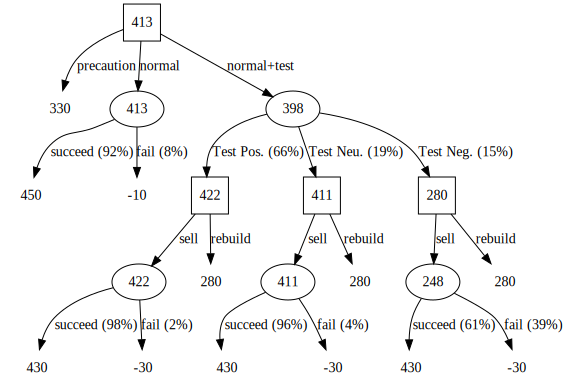

In [9]:
graph

### Running chunks of code directly

Next, open graphic_corporation.py in Spyder (or any other editor) and copy and paste the code into the following code box. Alter the probability of okay to .85 instead of .92. Moreover, increase the failure cost to 200. Then execute the code.

In [18]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jan 22 13:09:39 2018

@author: pengshi
"""
from decisiontrees import Node
# Parameters for the decision tree
okay=.85

pos_when_okay=.7
neu_when_okay=.2
neg_when_okay=.1

pos_when_fail=.15
neu_when_fail=.1
neg_when_fail=.75

revenue=1050
baseCost=600
precautionCost=720
rebuildCost=150
reinstallCost=210
testCost=20
failCost=200

def buildTree():
    ''' The function builds the decision tree for the Graphic corporation case, given certain parameters '''
    
    # Calculate the relevant probabilities: pos_okay=P(pos and okay), okay_when_pos=P(okay|pos), posProb=P(pos)
    fail=1-okay
    pos_okay=okay*pos_when_okay
    pos_fail=fail*pos_when_fail
    neu_okay=okay*neu_when_okay
    neu_fail=fail*neu_when_fail
    neg_okay=okay*neg_when_okay
    neg_fail=fail*neg_when_fail

    okay_when_pos=pos_okay/(pos_okay+pos_fail)
    okay_when_neu=neu_okay/(neu_okay+neu_fail)
    okay_when_neg=neg_okay/(neg_okay+neg_fail)
    
    posProb=pos_okay+pos_fail
    neuProb=neu_okay+neu_fail
    negProb=neg_okay+neg_fail
    
    # Build the tree. For outcome nodes, we assign the value, which is the net profit from that outcome. 
    # For decision nodes, we give a list of children (branches from the node corresponding to possible decisions).
    # For event nodes, we give first a list of the children, then a list of the corresponding probabilities.
    pos_fail=Node('fail',value=revenue-baseCost-rebuildCost-reinstallCost-testCost-failCost)
    pos_succeed=Node('succeed',value=revenue-baseCost-testCost)
    pos_rebuild=Node('rebuild',value=revenue-baseCost-rebuildCost-testCost)
    pos_normal=Node('sell',[pos_succeed,pos_fail],[okay_when_pos, 1-okay_when_pos])
    pos_root=Node('Test Pos.',[pos_normal,pos_rebuild])

    neu_fail=Node('fail',value=revenue-baseCost-rebuildCost-reinstallCost-testCost-failCost)
    neu_succeed=Node('succeed',value=revenue-baseCost-testCost)
    neu_rebuild=Node('rebuild',value=revenue-baseCost-rebuildCost-testCost)
    neu_normal=Node('sell',[neu_succeed,neu_fail],[okay_when_neu,1-okay_when_neu])
    neu_root=Node('Test Neu.',[neu_normal,neu_rebuild])

    neg_fail=Node('fail',value=revenue-baseCost-rebuildCost-reinstallCost-testCost-failCost)
    neg_succeed=Node('succeed',value=revenue-baseCost-testCost)
    neg_rebuild=Node('rebuild',value=revenue-baseCost-rebuildCost-testCost)
    neg_normal=Node('sell',[neg_succeed,neg_fail],[okay_when_neg,1-okay_when_neg])
    neg_root=Node('Test Neg.',[neg_normal,neg_rebuild])

    precaution=Node('precaution',value=revenue-precautionCost)
    fail=Node('fail',value=revenue-baseCost-rebuildCost-reinstallCost-failCost)
    succeed=Node('succeed',value=revenue-baseCost)
    normal=Node('normal',[succeed,fail],[okay,1-okay])

    normal_test=Node('normal+test',[pos_root,neu_root,neg_root],[posProb,neuProb,negProb])
    tree=Node('Dana',[precaution,normal,normal_test])
    return tree

tree=buildTree()
graph=tree.graph()


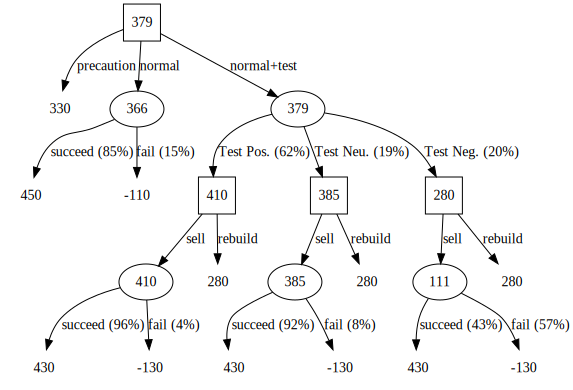

In [12]:
graph

Type code in the following box to change the parameters you altered back to the original in the `graphic_corporation.py` below, then type `tree.graph(False)` below to display the shape of the tree without evaluting it.

In [13]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jan 22 13:09:39 2018

@author: pengshi
"""
from decisiontrees import Node
# Parameters for the decision tree
okay=.92

pos_when_okay=.7
neu_when_okay=.2
neg_when_okay=.1

pos_when_fail=.15
neu_when_fail=.1
neg_when_fail=.75

revenue=1050
baseCost=600
precautionCost=720
rebuildCost=150
reinstallCost=210
testCost=20
failCost=100

def buildTree():
    ''' The function builds the decision tree for the Graphic corporation case, given certain parameters '''
    
    # Calculate the relevant probabilities: pos_okay=P(pos and okay), okay_when_pos=P(okay|pos), posProb=P(pos)
    fail=1-okay
    pos_okay=okay*pos_when_okay
    pos_fail=fail*pos_when_fail
    neu_okay=okay*neu_when_okay
    neu_fail=fail*neu_when_fail
    neg_okay=okay*neg_when_okay
    neg_fail=fail*neg_when_fail

    okay_when_pos=pos_okay/(pos_okay+pos_fail)
    okay_when_neu=neu_okay/(neu_okay+neu_fail)
    okay_when_neg=neg_okay/(neg_okay+neg_fail)
    
    posProb=pos_okay+pos_fail
    neuProb=neu_okay+neu_fail
    negProb=neg_okay+neg_fail
    
    # Build the tree. For outcome nodes, we assign the value, which is the net profit from that outcome. 
    # For decision nodes, we give a list of children (branches from the node corresponding to possible decisions).
    # For event nodes, we give first a list of the children, then a list of the corresponding probabilities.
    pos_fail=Node('fail',value=revenue-baseCost-rebuildCost-reinstallCost-testCost-failCost)
    pos_succeed=Node('succeed',value=revenue-baseCost-testCost)
    pos_rebuild=Node('rebuild',value=revenue-baseCost-rebuildCost-testCost)
    pos_normal=Node('sell',[pos_succeed,pos_fail],[okay_when_pos, 1-okay_when_pos])
    pos_root=Node('Test Pos.',[pos_normal,pos_rebuild])

    neu_fail=Node('fail',value=revenue-baseCost-rebuildCost-reinstallCost-testCost-failCost)
    neu_succeed=Node('succeed',value=revenue-baseCost-testCost)
    neu_rebuild=Node('rebuild',value=revenue-baseCost-rebuildCost-testCost)
    neu_normal=Node('sell',[neu_succeed,neu_fail],[okay_when_neu,1-okay_when_neu])
    neu_root=Node('Test Neu.',[neu_normal,neu_rebuild])

    neg_fail=Node('fail',value=revenue-baseCost-rebuildCost-reinstallCost-testCost-failCost)
    neg_succeed=Node('succeed',value=revenue-baseCost-testCost)
    neg_rebuild=Node('rebuild',value=revenue-baseCost-rebuildCost-testCost)
    neg_normal=Node('sell',[neg_succeed,neg_fail],[okay_when_neg,1-okay_when_neg])
    neg_root=Node('Test Neg.',[neg_normal,neg_rebuild])

    precaution=Node('precaution',value=revenue-precautionCost)
    fail=Node('fail',value=revenue-baseCost-rebuildCost-reinstallCost-failCost)
    succeed=Node('succeed',value=revenue-baseCost)
    normal=Node('normal',[succeed,fail],[okay,1-okay])

    normal_test=Node('normal+test',[pos_root,neu_root,neg_root],[posProb,neuProb,negProb])
    tree=Node('Dana',[precaution,normal,normal_test])
    return tree

tree=buildTree()
graph=tree.graph(False)


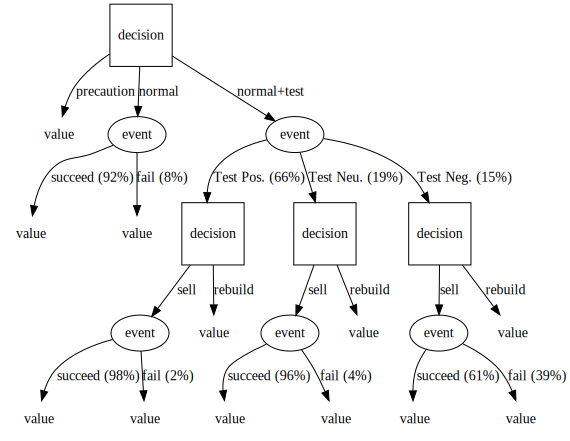

In [14]:
graph

Copy and paste the set of all original parameters of the Graphic Corporation case into the following cell. Then copy and paste into the following cell the last chunk of code (Labelled In\[35\]) from the the [course notes for session 3](http://nbviewer.jupyter.org/github/pengshi-usc/usc-dso-570/blob/master/Course%20Notes/03-Decision%20trees.ipynb) (Decision trees). This plots the profit of each decision as the failure cost varies. Make sure the output is the same as the last graph of the above course notes. 

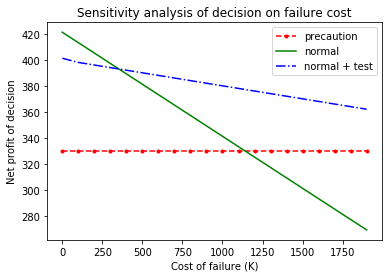

In [16]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jan 22 13:09:39 2018

@author: pengshi
"""
from decisiontrees import Node
# Parameters for the decision tree
okay=.92

pos_when_okay=.7
neu_when_okay=.2
neg_when_okay=.1

pos_when_fail=.15
neu_when_fail=.1
neg_when_fail=.75

revenue=1050
baseCost=600
precautionCost=720
rebuildCost=150
reinstallCost=210
testCost=20
failCost=100

def buildTree():
    ''' The function builds the decision tree for the Graphic corporation case, given certain parameters '''
    
    # Calculate the relevant probabilities: pos_okay=P(pos and okay), okay_when_pos=P(okay|pos), posProb=P(pos)
    fail=1-okay
    pos_okay=okay*pos_when_okay
    pos_fail=fail*pos_when_fail
    neu_okay=okay*neu_when_okay
    neu_fail=fail*neu_when_fail
    neg_okay=okay*neg_when_okay
    neg_fail=fail*neg_when_fail

    okay_when_pos=pos_okay/(pos_okay+pos_fail)
    okay_when_neu=neu_okay/(neu_okay+neu_fail)
    okay_when_neg=neg_okay/(neg_okay+neg_fail)
    
    posProb=pos_okay+pos_fail
    neuProb=neu_okay+neu_fail
    negProb=neg_okay+neg_fail
    
    # Build the tree. For outcome nodes, we assign the value, which is the net profit from that outcome. 
    # For decision nodes, we give a list of children (branches from the node corresponding to possible decisions).
    # For event nodes, we give first a list of the children, then a list of the corresponding probabilities.
    pos_fail=Node('fail',value=revenue-baseCost-rebuildCost-reinstallCost-testCost-failCost)
    pos_succeed=Node('succeed',value=revenue-baseCost-testCost)
    pos_rebuild=Node('rebuild',value=revenue-baseCost-rebuildCost-testCost)
    pos_normal=Node('sell',[pos_succeed,pos_fail],[okay_when_pos, 1-okay_when_pos])
    pos_root=Node('Test Pos.',[pos_normal,pos_rebuild])

    neu_fail=Node('fail',value=revenue-baseCost-rebuildCost-reinstallCost-testCost-failCost)
    neu_succeed=Node('succeed',value=revenue-baseCost-testCost)
    neu_rebuild=Node('rebuild',value=revenue-baseCost-rebuildCost-testCost)
    neu_normal=Node('sell',[neu_succeed,neu_fail],[okay_when_neu,1-okay_when_neu])
    neu_root=Node('Test Neu.',[neu_normal,neu_rebuild])

    neg_fail=Node('fail',value=revenue-baseCost-rebuildCost-reinstallCost-testCost-failCost)
    neg_succeed=Node('succeed',value=revenue-baseCost-testCost)
    neg_rebuild=Node('rebuild',value=revenue-baseCost-rebuildCost-testCost)
    neg_normal=Node('sell',[neg_succeed,neg_fail],[okay_when_neg,1-okay_when_neg])
    neg_root=Node('Test Neg.',[neg_normal,neg_rebuild])

    precaution=Node('precaution',value=revenue-precautionCost)
    fail=Node('fail',value=revenue-baseCost-rebuildCost-reinstallCost-failCost)
    succeed=Node('succeed',value=revenue-baseCost)
    normal=Node('normal',[succeed,fail],[okay,1-okay])

    normal_test=Node('normal+test',[pos_root,neu_root,neg_root],[posProb,neuProb,negProb])
    tree=Node('Dana',[precaution,normal,normal_test])
    return tree

tree=buildTree()
graph=tree.graph()

import matplotlib.pyplot as plt
failureCost=range(0,2000,100)
precaution=[]
normal=[]
normalTest=[]
for cost in failureCost:
    failCost=cost
    tree=buildTree()
    precautionNode,normalNode,normalTestNode=tree.children
    precaution.append(precautionNode.evaluate())
    normal.append(normalNode.evaluate())
    normalTest.append(normalTestNode.evaluate())
plt.plot(failureCost,precaution,'r--.',label='precaution')
plt.plot(failureCost,normal,'g',label='normal')
plt.plot(failureCost,normalTest,'b-.',label='normal + test')
plt.legend()
plt.title('Sensitivity analysis of decision on failure cost')
plt.ylabel('Net profit of decision')
plt.xlabel('Cost of failure (K)')
plt.show()




**Question:** *What is the optimal decision when the cost of failure is 750K?*

**Answer:** Normal+test

**Question:** *What does Shift-Enter in the Jupyter notebook do?* (See Jupyter help by typing ESC then h)

**Answer:**execuate the code


### Understanding the code

Use Spyder to open the two `.py` files you downloaded and identify the elements of Python from last session: objects, variables, functions, conditional statements, loops, import statements, etc. Use Python help (see course notes for instructions in Spyder and Jupyter notebooks) to help you understand unfamiliar commands. Do the same to the above code you copy pasted. The code may be complex for a beginner so it's okay if you don't get everything, but try your best.

After you are familiar with the code, answer the following questions.

**Question:** *What the line `from decisiontrees import Node` do?*

**Answer:** from a library import functions that will be used later.

**Question:** *What does `precaution.append(precautionNode.evaluate())` above do?*

**Answer:** (not so sure) evaluate the nodes further

**Question:** *What does `plt.plot(failureCost,precaution,'r--.',label='precaution')` do? Why is there a `'r--'` string as the third input?* 

**Answer:**That's to plot the line for the precaution group, and the 'r--.' is for the format of the line: r for color red and -- for it to be a dashed line.

# 2. Additional Sensitivity Analysis

Following the example above, make a plot of the value of the three decisions as a function of 

1. The rebuild cost, holding everything else at original values;
1. The precaution cost, holding everything else at original values;
2. The baseline probability of success, holding everything else at original values;

## Determine the Precise Threshold for a Decision

The failure cost graph at the end of section 1 shows roughly when it's optimal to do Normal+Test rather than Normal when the failure cost is about 300K, but it does not give the precise switch point. In this section, we find the precise answer. 

First, some new commands: the `scipy.optimize.bisect` function determines when is a function roughly zero, given a range to search within. The `str.format` function can be used to create formatted output. Below is an example. For additional details, use Python help or Google search. 

In [17]:
import scipy.optimize
def f(x):
    return x**2-4
print ('f(x)=0 at x={0:.2f}'.format(scipy.optimize.bisect(f,0,5)))
print ('f(x)=0 also at x={0:.2f}'.format(scipy.optimize.bisect(f,-5,0)))

f(x)=0 at x=2.00
f(x)=0 also at x=-2.00


Using the above as a guide, write a function that, given a failure cost, returns the difference between the value of the decision "Normal" and the decision "Normal+Test" under this failure cost. Then use the bisect function to figure out when this function is zero. This yields the exact failure cost above which it is better to perform the test. Similarly determine at what failure cost is it optimal to use "Precaution"

# 3. Analyzing a Decision Tree from Scratch

Following the example provided in the code for the Graphic Coporation Case, create an analogous `buildTree()` function to construct the decision tree for the "Buying a House Case" in Homework 2. Afterward, graph the structure of the tree without solving, then graph it again with the evaluated values of each node. Finally, perform a sensitivity analysis by solving the tree with different probabilities of being the only bidder, as well as make a graph of the value of each decision as a function of the probability, as above. Find the precise points at which the optimal decision changes. Use markdown cells to explain each step of your analysis as if explaining to a supervisor, as in the course notes of session 3. 

If you have extra time, choose other parameters to perform sensitivity analysis, or choose another decision tree to analyze.

In [19]:
from decisiontrees import Node

In [25]:
# Parameters for the decision tree

Market_Value=400000
Emotional_Value=10000

P_only_bidder=.3
P_multiple_bidders=.7

P_390k_Accepted_when_only_bidder=.4
P_400k_Accepted_when_only_bidder=.6
P_405k_Accepted_when_only_bidder=.9

P_390k_Accepted_when_multiple_bidder=.2
P_395k_Accepted_when_multiple_bidder=.3
P_400k_Accepted_when_multiple_bidder=.5
P_405k_Accepted_when_multiple_bidder=.7
P_410k_Accepted_when_multiple_bidder=.8

In [26]:
def buildTree2():    
    # Calculate the relevant probabilities
        P_390k_Accepted_only=P_only_bidder*P_390k_Accepted_when_only_bidder
        P_400k_Accepted_only=P_only_bidder*P_400k_Accepted_when_only_bidder
        P_405k_Accepted_only=P_only_bidder*P_405k_Accepted_when_only_bidder

        P_390k_multiple_Same_Accepted=P_multiple_bidders*P_390k_Accepted_when_multiple_bidder
        P_390k_multiple_Increase_Accepted=P_multiple_bidders*P_395k_Accepted_when_multiple_bidder
        P_400k_multiple_Same_Accepted=P_multiple_bidders*P_400k_Accepted_when_multiple_bidder
        P_400k_multiple_Increase_Accepted=P_multiple_bidders*P_405k_Accepted_when_multiple_bidder
        P_405k_multiple_Same_Accepted=P_multiple_bidders*P_405k_Accepted_when_multiple_bidder
        P_405k_multiple_Increase_Accepted=P_multiple_bidders*P_410k_Accepted_when_multiple_bidder

        P_390k_Not_Accepted_only=1-P_390k_Accepted_only
        P_400k_Not_Accepted_only=1-P_400k_Accepted_only
        P_405k_Not_Accepted_only=1-P_405k_Accepted_only

        
        

    # Build the tree. For outcome nodes, we assign the value, which is the net profit from that outcome. 
    # For decision nodes, we give a list of children (branches from the node corresponding to possible decisions).
    # For event nodes, we give first a list of the children, then a list of the corresponding probabilities.

#QQQQ: isn't selling a decision? why is it associated with not only children but also probability?
#QQQQ: isn't test positive an event? why is it only associated with children??
#### is it better to say the events that lead to the decision ---

    ### When one bidder
        Bid_390k_Accepted_only=Node('Accepted',value=Market_Value+Emotional_Value-390000)
        Bid_390k_Not_Accepted_only=Node('Not Accepted',value=0)
        Bid_390k_only=Node('Only Bidder',[Bid_390k_Accepted_only,Bid_390k_Not_Accepted_only],[P_390k_Accepted_only,P_390k_Not_Accepted_only])

        Bid_400k_Accepted_only=Node('Accepted',value=Market_Value+Emotional_Value-400000)
        Bid_400k_Not_Accepted_only=Node('Not Accepted',value=0)
        Bid_400k_only=Node('Only Bidder',[Bid_400k_Accepted_only,Bid_400k_Not_Accepted_only],[P_400k_Accepted_only,P_400k_Not_Accepted_only])

        Bid_405k_Accepted_only=Node('Accepted',value=Market_Value+Emotional_Value-405000)    
        Bid_405k_Not_Accepted_only=Node('Not Accepted',value=0)
        Bid_405k_only=Node('Only Bidder',[Bid_405k_Accepted_only,Bid_405k_Not_Accepted_only],[P_405k_Accepted_only,P_405k_Not_Accepted_only])

    ###when multiple bidder    
            ####390k 
        Bid_390k_Withdraw=Node('Withdraw',value=0)
        Bid_390k_Accepted_multiple=Node('Accepted',value=Market_Value+Emotional_Value-390000)
        Bid_390k_Not_Accepted_multiple=Node('Not Accepted',value=0)
        Same_390k=Node('Submit Same',[Bid_390k_Accepted_multiple,Bid_390k_Not_Accepted_multiple],[P_390k_multiple_Same_Accepted,1-P_390k_multiple_Same_Accepted])
        Bid_395k_Accepted_multiple=Node('Accepted',value=Market_Value+Emotional_Value-395000)
        Bid_395k_Not_Accepted_multiple=Node('Not Accepted',value=0)
        Increase_390k=Node('Increase $5k',[Bid_395k_Accepted_multiple,Bid_395k_Not_Accepted_multiple],[P_390k_multiple_Increase_Accepted,1-P_390k_multiple_Increase_Accepted])
        Bid_390k_multiple=Node('Multiple Bidder',[Bid_390k_Withdraw,Same_390k,Increase_390k])

            ####400k
        Bid_400k_Withdraw=Node('Withdraw',value=0)        
        Bid_400k_Accepted_multiple=Node('Accepted',value=Market_Value+Emotional_Value-400000)
        Bid_400k_Not_Accepted_multiple=Node('Not Accepted',value=0)
        Same_400k=Node('Submit Same',[Bid_400k_Accepted_multiple,Bid_400k_Not_Accepted_multiple],[P_400k_multiple_Same_Accepted,1-P_400k_multiple_Same_Accepted])
        Bid_405k_Accepted_multiple=Node('Accepted',value=Market_Value+Emotional_Value-405000)
        Bid_405k_Not_Accepted_multiple=Node('Not Accepted',value=0)
        Increase_400k=Node('Increase $5k',[Bid_405k_Accepted_multiple,Bid_405k_Not_Accepted_multiple],[P_400k_multiple_Increase_Accepted,1-P_400k_multiple_Increase_Accepted])
        Bid_400k_multiple=Node('Multiple Bidder',[Bid_400k_Withdraw,Same_400k,Increase_400k])


            ####405k
        Bid_405k_Withdraw=Node('Withdraw',value=0)
        Bid_405k_Accepted_multiple=Node('Accepted',value=Market_Value+Emotional_Value-405000)
        Bid_405k_Not_Accepted_multiple=Node('Not Accepted',value=0)
        Same_405k=Node('Submit Same',[Bid_405k_Accepted_multiple,Bid_405k_Not_Accepted_multiple],[P_405k_multiple_Same_Accepted,1-P_405k_multiple_Same_Accepted])
        Bid_410k_Accepted_multiple=Node('Accepted',value=Market_Value+Emotional_Value-410000)
        Bid_410k_Not_Accepted_multiple=Node('Not Accepted',value=0)
        Increase_405k=Node('Increase $5k',[Bid_410k_Accepted_multiple,Bid_410k_Not_Accepted_multiple],[P_405k_multiple_Increase_Accepted,1-P_405k_multiple_Increase_Accepted])
        Bid_405k_multiple=Node('Multiple Bidder',[Bid_405k_Withdraw,Same_405k,Increase_405k])

    ###3 nodes multiple and single    
        Bid_390k=Node('$390K',[Bid_390k_only,Bid_390k_multiple],[P_only_bidder,1-P_only_bidder])
        Bid_400k=Node('$400K',[Bid_400k_only,Bid_400k_multiple],[P_only_bidder,1-P_only_bidder])
        Bid_405k=Node('$405K',[Bid_405k_only,Bid_405k_multiple],[P_only_bidder,1-P_only_bidder])


        tree_housing=Node('Housing',[Bid_390k,Bid_400k,Bid_405k])
        return tree_housing



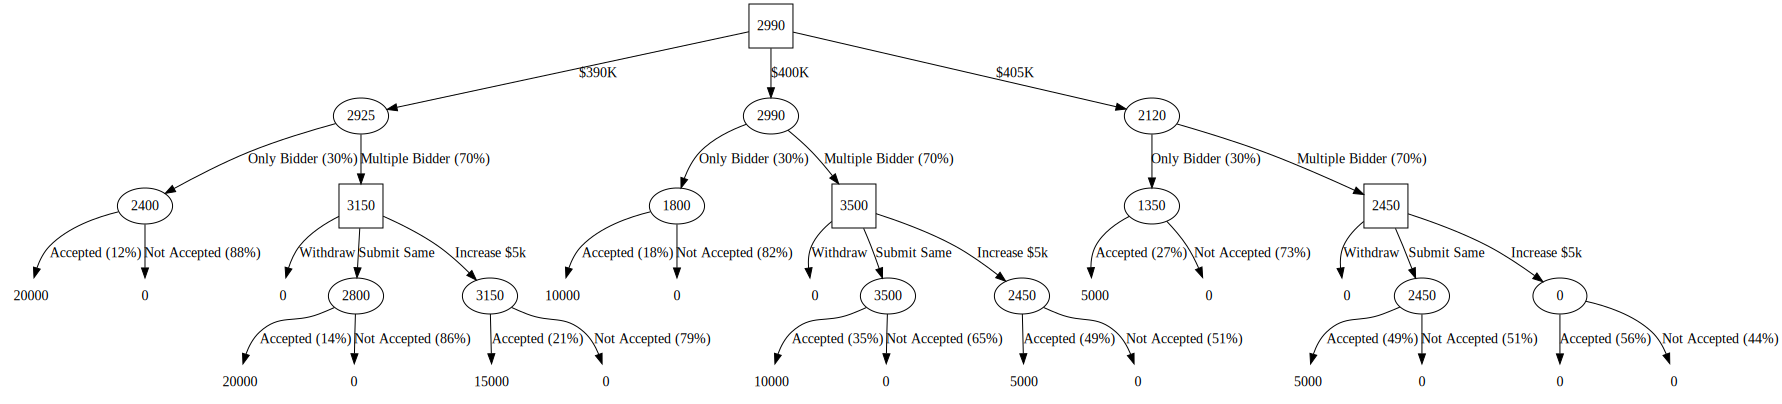

In [27]:
buildTree2().graph()